In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data into a Pandas dataframe
data = pd.read_csv('dataset/train_data.txt', header=None)
X = data.iloc[:, :-1] # Features
y = data.iloc[:, -1] # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the random forest classifier


[[106   0]
 [  0 102]]


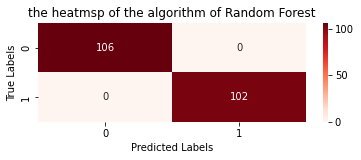

In [28]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the random forest classifier on the training data
rf.fit(X_train, y_train)

# Use the trained random forest classifier to make predictions on the testing data
y_pred_RF = rf.predict(X_test)
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
plt.subplot(2,1,1)
sns.heatmap(cm_RF,fmt='d', annot=True, cmap='Reds')
plt.title("the heatmsp of the algorithm of Random Forest")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_KNN = knn.predict(X_test)



[[97  9]
 [13 89]]


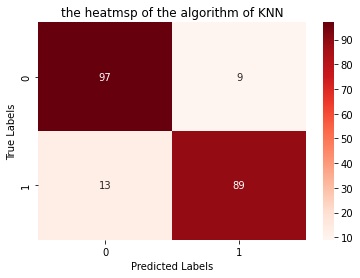

In [29]:
cm = confusion_matrix(y_test, y_pred_KNN)
print(cm)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.title("the heatmsp of the algorithm of KNN")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [17]:
svm = SVC(kernel='linear')

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM = svm.predict(X_test)

# Calculate the accuracy score of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


[[106   0]
 [  0 102]]


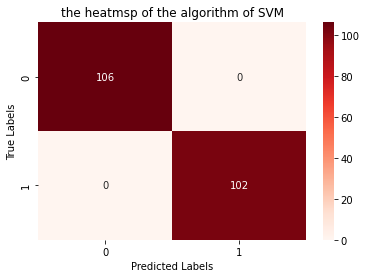

In [32]:
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds')
plt.title("the heatmsp of the algorithm of SVM")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset (assuming it is stored in a pandas DataFrame called "data")
data = pd.read_csv("dataset/train_data.txt", header=None) # assuming your dataset doesn't have column names

# Generate column names
num_columns = data.shape[1] - 1 # assuming the last column is the target variable
column_names = ["feature_" + str(i+1) for i in range(num_columns)] + ["target_variable"]

# Assign the column names to the DataFrame
data.columns = column_names

# Split the data into training and testing sets
X = data.drop(columns=["target_variable"]).values
y = data["target_variable"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
26/26 [==============================] - 12s 155ms/step - loss: 1.0809 - accuracy: 0.6983 - val_loss: 0.3337 - val_accuracy: 0.8894
Epoch 2/10
26/26 [==============================] - 2s 71ms/step - loss: 0.2583 - accuracy: 0.9171 - val_loss: 0.2654 - val_accuracy: 0.8798
Epoch 3/10
26/26 [==============================] - 3s 102ms/step - loss: 3.3412 - accuracy: 0.9087 - val_loss: 0.3105 - val_accuracy: 0.8462
Epoch 4/10
26/26 [==============================] - 5s 177ms/step - loss: 0.3930 - accuracy: 0.8462 - val_loss: 0.2925 - val_accuracy: 0.8798
Epoch 5/10
26/26 [==============================] - 5s 179ms/step - loss: 0.2203 - accuracy: 0.9219 - val_loss: 0.1535 - val_accuracy: 0.9567
Epoch 6/10
26/26 [==============================] - 5s 202ms/step - loss: 0.1361 - accuracy: 0.9507 - val_loss: 0.1177 - val_accuracy: 0.9712
Epoch 7/10
26/26 [==============================] - 5s 178ms/step - loss: 0.1039 - accuracy: 0.9651 - val_loss: 0.0870 - val_accuracy: 0.9760
Epoch 

In [43]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # classify the output to 0 and 1
accuracy = accuracy_score(y_test, y_pred) # calculate the accuracy
print("Accuracy:", accuracy)

# Plot the confusion matrix
cm_LSTM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

7/7 [==============================] - 1s 41ms/step
Accuracy: 1.0
Confusion Matrix:
 [[ 99   0]
 [  0 109]]


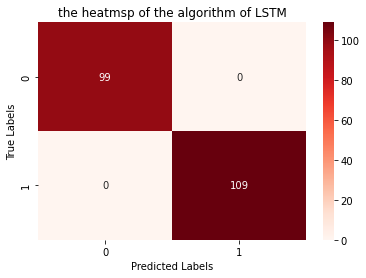

In [45]:
sns.heatmap(cm_LSTM, annot=True,fmt='d', cmap='Reds')
plt.title("the heatmsp of the algorithm of LSTM")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()